Original Kaggle: https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection

# Feature Selection

Feature selection or variable selection is the process of selecting a subset of relevant features or variables from the total features of a level in a data set to build machine learning algorithms.

# Feature Selection – Techniques

Feature selection techniques are categorized into 3 typers. These are as follows:

1. Filter methods
2. Wrapper methods
3. Embedded methods

# 1. Filter Methods

Filter methods are generally used as a preprocessing step. The selection of features is independent of any machine learning algorithms. Instead, features are selected on the basis of their scores in various statistical tests for their correlation with the outcome variable.

1. Basic methods
2. Univariate methods
3. Fischer score
4. Information Gain
5. ANOVA F-value
6. Correlation Matrix with Heatmap

# 1.1 Basic Methods

# 1.1.1 Removing Constant Features

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import the customer dataset from Kaggle
X_train = pd.read_csv('input/Customer/train.csv', nrows=35000)
X_test = pd.read_csv('input/Customer/test.csv', nrows=15000)

In [3]:
X_train.drop(labels=['TARGET'], axis=1, inplace = True)

In [4]:
X_train.shape, X_test.shape

((35000, 370), (15000, 370))

In [5]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_train) 

VarianceThreshold(threshold=0)

In [6]:
# get_support is a boolean vector that indicates which features are retained
# if we sum over get_support, we get the number of features that are not constant
sum(sel.get_support())

319

In [7]:
#constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

51


['ind_var2_0',
 'ind_var2',
 'ind_var18_0',
 'ind_var18',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var34_0',
 'ind_var34',
 'ind_var41',
 'ind_var46_0',
 'ind_var46',
 'num_var18_0',
 'num_var18',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_imp_amort_var18_1y3',
 'delta_imp_amort_var34_1y3',
 'imp_amort_var18_hace3',
 'imp_amort_var18_ult1',
 'imp_amort_var34_hace3',
 'imp_amort_var34_ult1',
 'imp_reemb_var13_hace3',
 'imp_reemb_var17_hace3',
 'imp_reemb_var33_hace3',
 'imp_trasp_var17_out_hace3',
 'imp_trasp_var33_out_hace3',
 'num_var2_0_ult1',
 'num_var2_ult1',
 'num_reemb_var13_hace3',
 'num_reemb_var17_hace3',
 'num_reemb_var33_hace3',
 'num_trasp_var17_out_hace3',
 'num_trasp_var33_out_hace3',
 'saldo_var2_ult1',
 'saldo_medio_var13_medio_hace3',
 'saldo_medio_var2

In [8]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [9]:
# check the shape of training and test set
X_train.shape, X_test.shape

((35000, 319), (15000, 319))

# 1.1.2 Remove quasi-constant features

In [10]:
X_train = pd.read_csv('input/Customer/train.csv', nrows=35000)
X_test = pd.read_csv('input/Customer/test.csv', nrows=15000)

In [11]:
X_train.drop(labels=['TARGET'], axis=1, inplace = True)

In [12]:
X_train.shape, X_test.shape

((35000, 370), (15000, 370))

In [13]:
sel = VarianceThreshold(threshold=0.01)  # 0.1 indicates 99% of observations approximately
sel.fit(X_train)  # fit finds the features with low variance

VarianceThreshold(threshold=0.01)

In [14]:
sum(sel.get_support())

263

In [15]:
# quasi-constant features
print(
    len([
        x for x in X_train.columns
        if x not in X_train.columns[sel.get_support()]
    ]))

[x for x in X_train.columns if x not in X_train.columns[sel.get_support()]]

107


['ind_var1',
 'ind_var2_0',
 'ind_var2',
 'ind_var6_0',
 'ind_var6',
 'ind_var13_largo',
 'ind_var13_medio_0',
 'ind_var13_medio',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var18_0',
 'ind_var18',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var27_0',
 'ind_var28_0',
 'ind_var28',
 'ind_var27',
 'ind_var29_0',
 'ind_var29',
 'ind_var30_0',
 'ind_var31_0',
 'ind_var31',
 'ind_var32_cte',
 'ind_var32_0',
 'ind_var32',
 'ind_var33_0',
 'ind_var33',
 'ind_var34_0',
 'ind_var34',
 'ind_var40',
 'ind_var41',
 'ind_var39',
 'ind_var44_0',
 'ind_var44',
 'ind_var46_0',
 'ind_var46',
 'num_var6_0',
 'num_var6',
 'num_var13_medio_0',
 'num_var13_medio',
 'num_var18_0',
 'num_var18',
 'num_op_var40_hace3',
 'num_var27_0',
 'num_var28_0',
 'num_var28',
 'num_var27',
 'num_var29_0',
 'num_var29',
 'num_var33',
 'num_var34_0',
 'num_var34',
 'num_var41',
 'num_var46_0',
 'num_var46',
 'saldo_var18',
 'saldo_var28',
 'saldo_var27',
 'saldo_var34',
 'saldo_var41',
 'saldo_var46',
 'delta_

In [16]:
# percentage of observations showing each of the different values
X_train['ind_var1'].value_counts() / np.float(len(X_train))

0    0.995971
1    0.004029
Name: ind_var1, dtype: float64

In [17]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [18]:
X_train.shape, X_test.shape

((35000, 263), (15000, 263))

# 1.2 Univariate selection methods 
Univariate feature selection methods works by selecting the best features based on univariate statistical tests like ANOVA. It can be seen as a preprocessing step to an estimator. Scikit-learn exposes feature selection routines as objects that implement the transform method.

# 1.2.1 SelectKBest

This method select features according to the k highest scores. For instance, we can perform a chi-square test to the samples to retrieve only the two best features from iris dataset as follows:

In [19]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [20]:
# select the two best features
X_new = SelectKBest(chi2, k=2).fit_transform(X, y)
X_new.shape

(150, 2)

# 1.2.2 SelectPercentile
Select features according to a percentile of the highest scores.

In [21]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectPercentile, chi2
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [22]:
X_new = SelectPercentile(chi2, percentile=10).fit_transform(X, y)
X_new.shape

(1797, 7)

# 1.3 Fisher Score (chi-square implementation) 
It is the chi-square implementation in scikit-learn. It computes chi-squared stats between each non-negative feature and class.

In [23]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2

In [24]:
# Load Data
# load iris data
iris = load_iris()

# create features and target
X = iris.data
y = iris.target

# convert to categorical data by converting data to integers
X = X.astype(int)

In [25]:
# Compare Chi-Squared Statistics
# select two features with highest chi-squared statistics
chi2_selector = SelectKBest(chi2, k=2)
X_kbest = chi2_selector.fit_transform(X, y)

In [26]:
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


# 1.4 Information Gain
Mutual information measures the information that X and Y share: It measures how much knowing one of these variables reduces uncertainty about the other. For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X is shared with Y: knowing X determines the value of Y and vice versa. As a result, in this case the mutual information is the same as the uncertainty contained in Y (or X) alone, namely the entropy of Y (or X). Moreover, this mutual information is the same as the entropy of X and as the entropy of Y. (A very special case of this is when X and Y are the same random variable.)

# 1.5 ANOVA F-value
Analysis of Variance (ANOVA) is a statistical formula used to compare variances across the means (or average) of different groups. 

In [27]:
# Load libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [28]:
# Load iris data
iris = load_iris()

# Create features and target
X = iris.data
y = iris.target

In [29]:
# Select Features With Best ANOVA F-Values

# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=2)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)

In [30]:
# View results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kbest.shape[1])

Original number of features: 4
Reduced number of features: 2


# 1.6 Correlation-Matrix with Heatmap
Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other.

In [31]:
# Load iris data
from sklearn.datasets import load_iris
iris = load_iris()

# Create features and target
X = iris.data
y = iris.target

In [32]:
# Convert feature matrix into DataFrame
df = pd.DataFrame(X)

# View the data frame
print(df)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [33]:
# Create correlation matrix
corr_matrix = df.corr()
print(corr_matrix)

          0         1         2         3
0  1.000000 -0.117570  0.871754  0.817941
1 -0.117570  1.000000 -0.428440 -0.366126
2  0.871754 -0.428440  1.000000  0.962865
3  0.817941 -0.366126  0.962865  1.000000


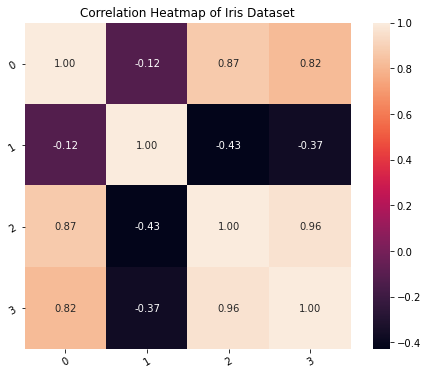

In [34]:
# Create correlation heatmap
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Iris Dataset')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black')
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()   

In [35]:
 # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper   

,0,1,2,3
0,NaN,-0.11757,0.871754,0.817941
1,NaN,NaN,-0.428440,-0.366126
2,NaN,NaN,NaN,0.962865
3,NaN,NaN,NaN,NaN


In [36]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

[3]


In [37]:
# Drop Marked Features
df1 = df.drop(df.columns[to_drop], axis=1)
print(df1)

       0    1    2
0    5.1  3.5  1.4
1    4.9  3.0  1.4
2    4.7  3.2  1.3
3    4.6  3.1  1.5
4    5.0  3.6  1.4
..   ...  ...  ...
145  6.7  3.0  5.2
146  6.3  2.5  5.0
147  6.5  3.0  5.2
148  6.2  3.4  5.4
149  5.9  3.0  5.1

[150 rows x 3 columns]


# Wrapper Methods
In wrapper methods, we try to use a subset of features and train a model using them. Based on the inferences that we draw from the previous model, we decide to add or remove features from the subset. The problem is essentially reduced to a search problem. These methods are usually computationally very expensive.

1. Forward Selection
2. Backward Elimination
3. Exhaustive Feature Selection
4. Recursive Feature Elimination
5. Recursive Feature Elimination with Cross-Validation

# 2.1 Forward Selection
Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

The procedure starts with an empty set of features [reduced set]. The best of the original features is determined and added to the reduced set. At each subsequent iteration, the best of the remaining original attributes is added to the set.

Step forward feature selection starts by evaluating all features individually and selects the one that generates the best performing algorithm, according to a pre-set evaluation criteria. In the second step, it evaluates all possible combinations of the selected feature and a second feature, and selects the pair that produce the best performing algorithm based on the same pre-set criteria.

The pre-set criteria can be the roc_auc for classification and the r squared for regression for example.

This selection procedure is called greedy, because it evaluates all possible single, double, triple and so on feature combinations. Therefore, it is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

There is a special package for python that implements this type of feature selection: mlxtend.

In the mlxtend implementation of the step forward feature selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [39]:
#load dataset
data = pd.read_csv('input/Home/train.csv')
data.shape

(1460, 81)

In [40]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [41]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [42]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  3


In [43]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((1022, 34), (438, 34))

In [44]:
X_train.fillna(0, inplace=True)

In [45]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)


[2023-09-13 23:13:04] Features: 1/10 -- score: 0.6668389968357925
[2023-09-13 23:13:13] Features: 2/10 -- score: 0.7224408079501291
[2023-09-13 23:13:23] Features: 3/10 -- score: 0.7458518732597609
[2023-09-13 23:13:33] Features: 4/10 -- score: 0.7658841084415368
[2023-09-13 23:13:44] Features: 5/10 -- score: 0.7706289349886205
[2023-09-13 23:13:55] Features: 6/10 -- score: 0.7725190959001784
[2023-09-13 23:14:08] Features: 7/10 -- score: 0.7848657760251339
[2023-09-13 23:14:26] Features: 8/10 -- score: 0.8270101888975598
[2023-09-13 23:14:46] Features: 9/10 -- score: 0.8438575269153996
[2023-09-13 23:15:09] Features: 10/10 -- score: 0.8515327695078166

In [46]:
sfs1.k_feature_idx_

(4, 5, 9, 10, 14, 16, 17, 19, 22, 24)

In [47]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['OverallQual', 'OverallCond', 'BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'GarageCars'],
      dtype='object')

We can see that forward feature selection results in the above columns being selected from all the given columns.

# 2.2 Backward Elimination
In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features.

The procedure starts with the full set of attributes. At each step, it removes the worst attribute remaining in the set.

In [48]:
sfs1 = SFS(RandomForestRegressor(), 
           k_features=10, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)


[2023-09-13 23:16:43] Features: 33/10 -- score: 0.8564573782395994
[2023-09-13 23:18:11] Features: 32/10 -- score: 0.8562304746402635
[2023-09-13 23:19:35] Features: 31/10 -- score: 0.8551576667846934
[2023-09-13 23:20:55] Features: 30/10 -- score: 0.8543964438236468
[2023-09-13 23:22:09] Features: 29/10 -- score: 0.8568339196019377
[2023-09-13 23:23:19] Features: 28/10 -- score: 0.8552845806935284
[2023-09-13 23:24:22] Features: 27/10 -- score: 0.8570737786903573
[2023-09-13 23:25:22] Features: 26/10 -- score: 0.8582557718139844
[2023-09-13 23:26:16] Features: 25/10 -- score: 0.8602160793918788
[2023-09-13 23:27:07] Features: 24/10 -- score: 0.85843597877244
[2023-09-13 23:27:55] Features: 23/10 -- score: 0.8575310536234189
[2023-09-13 23:28:40] Features: 22/10 -- score: 0.8583731464803818
[2023-09-13 23:29:22] Features: 21/10 -- score: 0.8621919351170412
[2023-09-13 23:29:58] Features: 20/10 -- score: 0.8578119657036002
[2023-09-13 23:30:33] Features: 19/10 -- score: 0.8612957017815

In [49]:
sfs1.k_feature_idx_

(3, 4, 5, 6, 9, 14, 16, 18, 24, 26)

In [50]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       '2ndFlrSF', 'GrLivArea', 'BsmtHalfBath', 'GarageCars', 'OpenPorchSF'],
      dtype='object')

So, backward feature elimination results in the following columns being selected.

# 2.3 Exhaustive Feature Selection
In an exhaustive feature selection the best subset of features is selected, over all possible feature subsets, by optimizing a specified performance metric for a certain machine learning algorithm.

This is another greedy algorithm as it evaluates all possible feature combinations. It is quite computationally expensive, and sometimes, if feature space is big, even unfeasible.

# 2.4 Recursive Feature Elimination
It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

Recursive feature elimination performs a greedy search to find the best performing feature subset. It iteratively creates models and determines the best or the worst performing feature at each iteration. It constructs the subsequent models with the left features until all the features are explored. It then ranks the features based on the order of their elimination. In the worst case, if a dataset contains N number of features RFE will do a greedy search for 2N combinations of features.

# 2.5 Recursive Feature Elimination with Cross-Validation
Recursive Feature Elimination with Cross-Validated (RFECV) feature selection technique selects the best subset of features for the estimator by removing 0 to N features iteratively using recursive feature elimination.

Then it selects the best subset based on the accuracy or cross-validation score or roc-auc of the model. Recursive feature elimination technique eliminates n features from a model by fitting the model multiple times and at each step, removing the weakest features.

# Embedded Methods
Embedded methods are iterative in a sense that takes care of each iteration of the model training process and carefully extract those features which contribute the most to the training for a particular iteration. Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.

This is why Regularization methods are also called penalization methods that introduce additional constraints into the optimization of a predictive algorithm (such as a regression algorithm) that bias the model toward lower complexity (fewer coefficients).

1. LASSO
2. Tree Importance

# 3.1 LASSO Regression
Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.

Regularisation consists in adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model and in other words to avoid overfitting. In linear model regularisation, the penalty is applied over the coefficients that multiply each of the predictors. From the different types of regularisation, Lasso or l1 has the property that is able to shrink some of the coefficients to zero. Therefore, that feature can be removed from the model.

In [51]:
#load libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [52]:
# load dataset
data = pd.read_csv('input/Home/train.csv')
data.shape

(1460, 81)

In [53]:
# In practice, feature selection should be done after data pre-processing,
# so ideally, all the categorical variables are encoded into numbers,
# and then you can assess how deterministic they are of the target

# here for simplicity I will use only numerical variables
# select numerical columns:

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [54]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [55]:
# the features in the house dataset are in very
# different scales, so it helps the regression to scale them

scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler()

In [56]:
# train a Lasso Linear regression
sel_ = SelectFromModel(Lasso(alpha=100))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=Lasso(alpha=100))

In [57]:
sel_.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True])

In [58]:
# make a list with the selected features and print the outputs
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 37
selected features: 33
features with coefficients shrank to zero: 4


We can see that Lasso regularisation helps to remove non-important features from the dataset. So, increasing the penalisation will result in increase the number of features removed. Therefore, we need to keep an eye and monitor that we don't set a penalty too high so that to remove even important features, or too low and then not remove non-important features.

If the penalty is too high and important features are removed, we will notice a drop in the performance of the algorithm and then realise that we need to decrease the regularisation.

# 3.2 Random Forest Importance
Random forests are one the most popular machine learning algorithms. They are so successful because they provide in general a good predictive performance, low overfitting and easy interpretability. This interpretability is given by the fact that it is straightforward to derive the importance of each variable on the tree decision. In other words, it is easy to compute how much each variable is contributing to the decision.

In [59]:
# Import libraries
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [60]:
# Load dataset
df = pd.read_csv('input/mushrooms.csv')

In [61]:
# Declare feature vector and target variable
X = df.drop(['class'], axis = 1)
y = df['class']

In [62]:
# Encode categorical variables
X = pd.get_dummies(X, prefix_sep='_')
y = LabelEncoder().fit_transform(y)

In [63]:
# Normalize feature vector
X2 = StandardScaler().fit_transform(X)

In [64]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.30, random_state = 0)

In [65]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [66]:
# fit the classifier to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [67]:
# predict on the test set
y_pred = clf.predict(X_test)

# Feature Importance
Decision Trees models which are based on ensembles (eg. Extra Trees and Random Forest) can be used to rank the importance of the different features. Knowing which features our model is giving most importance can be of vital importance to understand how our model is making it’s predictions (therefore making it more explainable). At the same time, we can get rid of the features which do not bring any benefit to our model.

<AxesSubplot:>

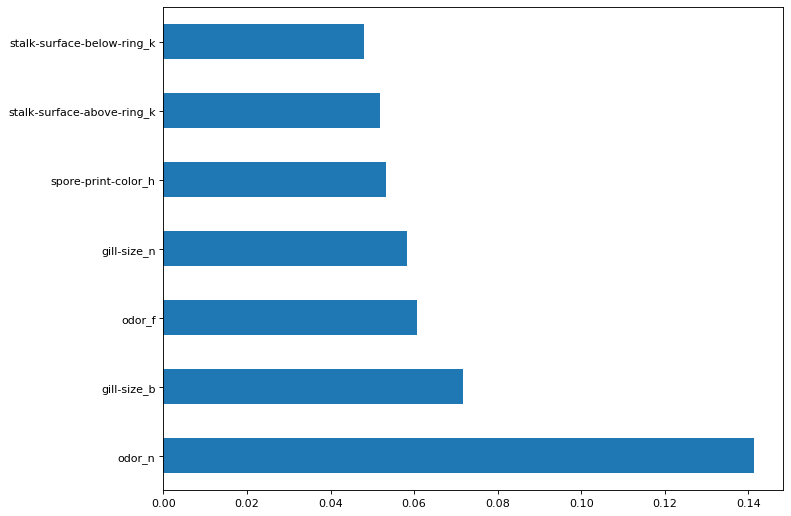

In [68]:
# visualize feature importance

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')
feat_importances = pd.Series(clf.feature_importances_, index= X.columns)
feat_importances.nlargest(7).plot(kind='barh')